#**LOGISTIC REGRESSION**

###Importing libraries and dependancies 

In [ ]:
%pip install -r requirements.txt

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import digitfilter as df 

#Load *MNISTmini* dataset 
#+ filtering for digits 2 and 3

In [2]:
data_path = '../data/MNISTmini.mat'

digit1 = 2
digit2 = 3
rand_seed = 42

X_train_binary, y_train_binary, X_val_binary, y_val_binary, X_test_binary, y_test_binary = df.load_binary_digits(data_path, digit1, digit2, rand_seed)
print(f"Binary Classification (Digit 2 vs 3)")
print(f"Train shape: {X_train_binary.shape}, Class distribution: {np.bincount(y_train_binary)}")
print(f"Val shape: {X_val_binary.shape}, Class distribution: {np.bincount(y_val_binary)}")
print(f"Test shape: {X_test_binary.shape}, Class distribution: {np.bincount(y_test_binary)}")

Binary Classification (Digit 2 vs 3)
Train shape: (1000, 100), Class distribution: [500 500]
Val shape: (1000, 100), Class distribution: [500 500]
Test shape: (1000, 100), Class distribution: [500 500]


### Hyperparameter tuning: Train models with different C values & Plotting

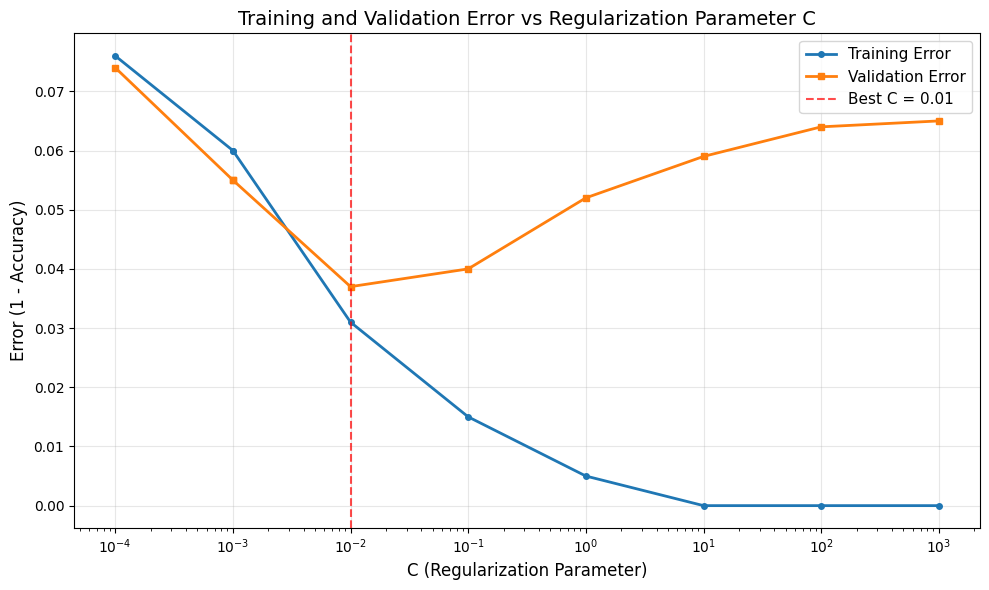

Training errors: ['0.0760', '0.0600', '0.0600', '0.0310', '0.0150', '0.0050', '0.0000', '0.0000', '0.0000']
Validation errors: ['0.0740', '0.0550', '0.0550', '0.0370', '0.0400', '0.0520', '0.0590', '0.0640', '0.0650']

Best C value: 0.01 (validation error: 0.0370)


In [58]:
# Define range of C values (regularization hyperparameter)
# Lower C = stronger regularization, Higher C = weaker regularization
C_values = [0.0001, 0.001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Store errors for each C value
train_errors = []
val_errors = []

# Train and evaluate models for each C value
for C in C_values:
    # Train logistic regression model
    model = LogisticRegression(
        C=C,
        penalty='l2',
        solver='liblinear',
        max_iter=1000,
        random_state=42
    )
    model.fit(X_train_binary, y_train_binary)
    
    # Calculate training error
    y_train_pred = model.predict(X_train_binary)
    train_acc = accuracy_score(y_train_binary, y_train_pred)
    train_error = 1 - train_acc
    train_errors.append(train_error)
    
    # Calculate validation error
    y_val_pred = model.predict(X_val_binary)
    val_acc = accuracy_score(y_val_binary, y_val_pred)
    val_error = 1 - val_acc
    val_errors.append(val_error)
    
# Find best C (lowest validation error)
best_idx = np.argmin(val_errors)
best_C = C_values[best_idx]

# Plot training and validation errors
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_errors, 'o-', label='Training Error', linewidth=2, markersize=4)
plt.plot(C_values, val_errors, 's-', label='Validation Error', linewidth=2, markersize=4)

# Mark the best C value
plt.axvline(x=best_C, color='r', linestyle='--', alpha=0.7, label=f'Best C = {best_C}')

plt.xscale('log')  # Use log scale for C values
plt.xlabel('C (Regularization Parameter)', fontsize=12)
plt.ylabel('Error (1 - Accuracy)', fontsize=12)
plt.title('Training and Validation Error vs Regularization Parameter C', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary
print(f"Training errors: {[f'{e:.4f}' for e in train_errors]}")
print(f"Validation errors: {[f'{e:.4f}' for e in val_errors]}")

print(f"\nBest C value: {best_C} (validation error: {val_errors[best_idx]:.4f})")


### Train final model with best C and evaluate on test set

Final Model Performance:
  Best C value: 0.01
  Training Error: 0.0310
  Validation Error: 0.0370
  Test Error: 0.0590
  Test Accuracy: 0.9410


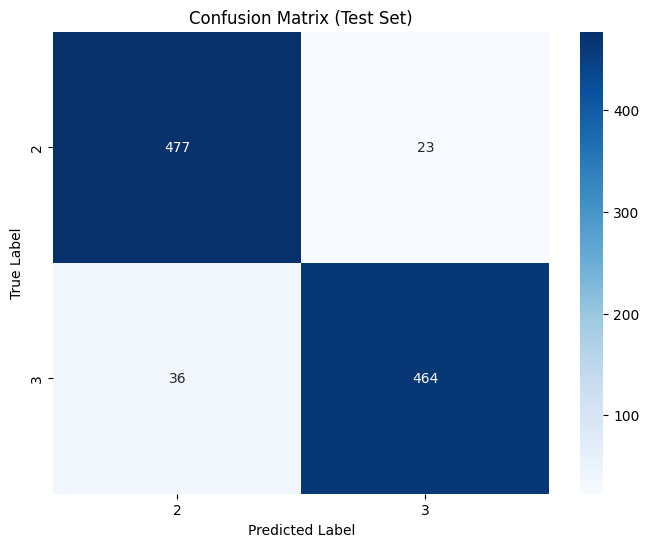

In [54]:
# Train final model with best C value on training set
final_model = LogisticRegression(
    C=best_C,
    penalty='l2',
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

X_combined = np.concatenate((X_train_binary, X_val_binary), axis=0)
y_combined = np.concatenate((y_train_binary, y_val_binary), axis=0)

final_model.fit(X_combined, y_combined)

# Evaluate on test set
y_test_pred = final_model.predict(X_test_binary)
test_acc = accuracy_score(y_test_binary, y_test_pred)
test_error = 1 - test_acc

print(f"Final Model Performance:")
print(f"  Best C value: {best_C}")
print(f"  Training Error: {train_errors[best_idx]:.4f}")
print(f"  Validation Error: {val_errors[best_idx]:.4f}")
print(f"  Test Error: {test_error:.4f}")
print(f"  Test Accuracy: {test_acc:.4f}")

# Confusion matrix for test set
cm = confusion_matrix(y_test_binary, y_test_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['2', '3'], yticklabels=['2', '3'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Set)')
plt.show()